In [1]:
# Import Required Libraries
import pandas as pd
import pickle
import numpy as np

### Import Data Sample

In [3]:
file = open('./Data/flight_2019_sample','rb')
Flight_sample = pickle.load(file)
file.close()

In [4]:
# Remove any columns with More than 30% NaN values
Flight_sample = Flight_sample.loc[:, Flight_sample.isnull().mean() < .3]

### Determine correlated Feature Data

In [5]:
# Find any records with multiple flights, if none - then remove column from dataset as all values are 1
print(Flight_sample.loc[Flight_sample['flights'] == 0.0])
print(Flight_sample.loc[Flight_sample['flights'] < 1.0])
Flight_sample.drop(['flights','year'], axis=1, inplace=True)

Empty DataFrame
Columns: [mkt_unique_carrier, branded_code_share, mkt_carrier_fl_num, op_unique_carrier, tail_num, op_carrier_fl_num, origin_city_name, dest_city_name, origin_airport_id, dest_airport_id, crs_dep_time, dep_time, dep_delay, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, arr_delay, cancelled, diverted, dup, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, fl_date, year, month, total_delay, is_delay]
Index: []

[0 rows x 38 columns]
Empty DataFrame
Columns: [mkt_unique_carrier, branded_code_share, mkt_carrier_fl_num, op_unique_carrier, tail_num, op_carrier_fl_num, origin_city_name, dest_city_name, origin_airport_id, dest_airport_id, crs_dep_time, dep_time, dep_delay, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, arr_delay, cancelled, diverted, dup, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, carrier_delay, weather_d

In [6]:
# Calculate Correlated features from sample
Corr = Flight_sample.corr(method ='pearson')

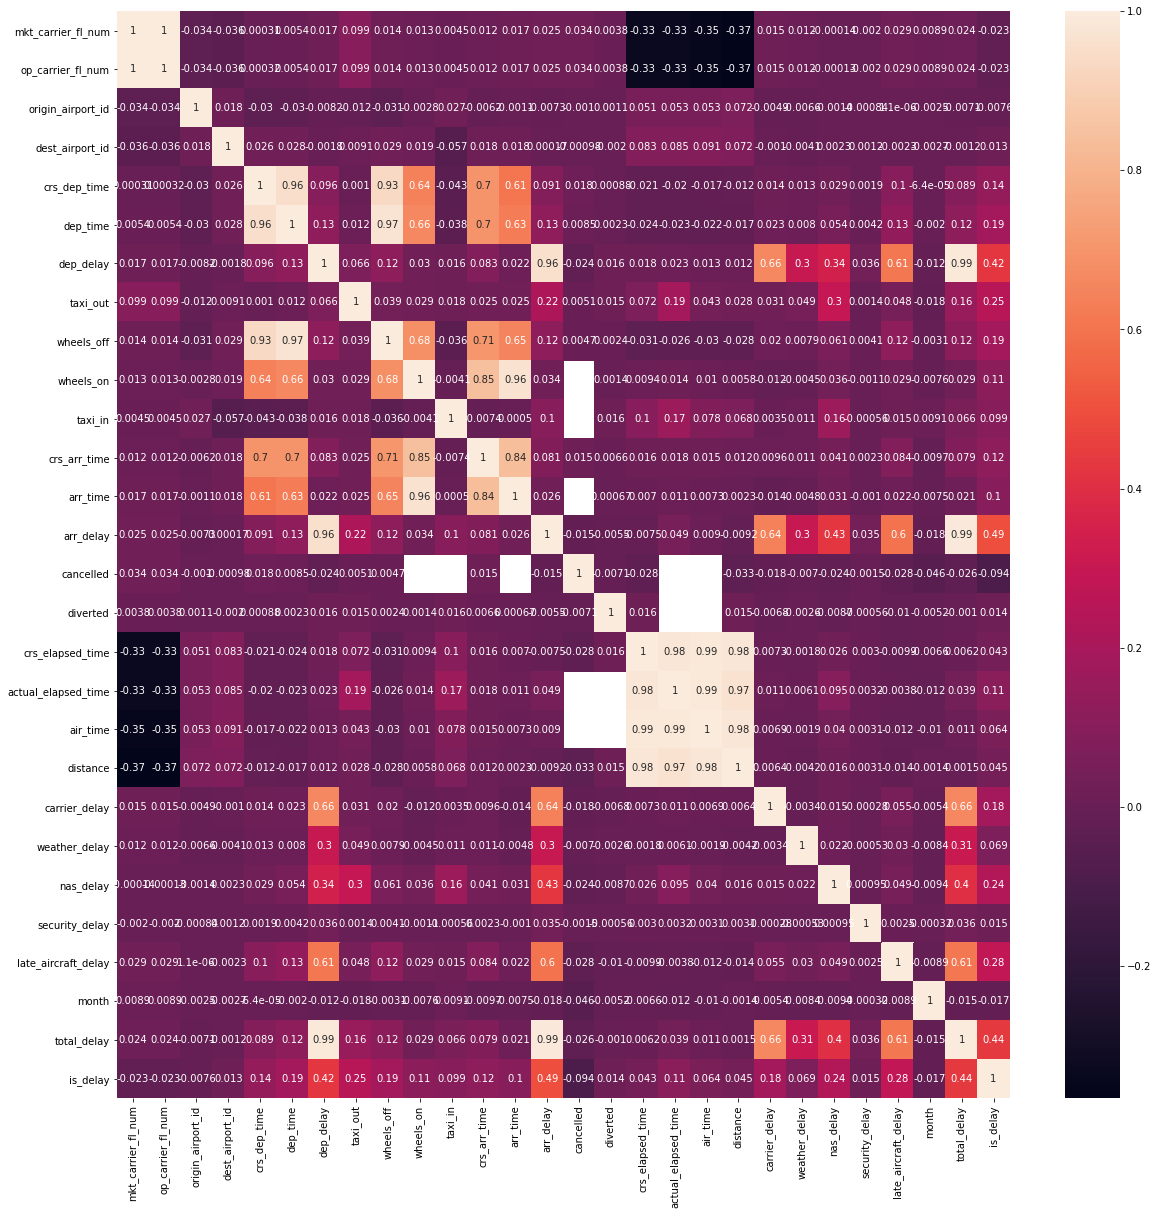

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sn.heatmap(Corr, annot=True)
plt.show()

In [8]:
# Drop 100% correlational values(diagonal values in matrix)
Corr1 = Corr[Corr < 1].unstack().transpose().sort_values(ascending=False).drop_duplicates()

In [40]:
# Get all correlations above threshold value
threshold = 0.60
Corr1 = Corr1[Corr1 < threshold]

# Extract all feature names from correlations above threshold
Corr_data = Corr1.index.values

# Flatten into list format
lst = [Corr_data[x][y] for x in range(len(Corr_data)) for y in range(2)]

# Isolate Unique feature names
unique_features = list(set(lst))
unique_features

['total_delay',
 'wheels_off',
 'arr_delay',
 'mkt_carrier_fl_num',
 'month',
 'security_delay',
 'late_aircraft_delay',
 'taxi_out',
 'diverted',
 'taxi_in',
 'dest_airport_id',
 'cancelled',
 'op_carrier_fl_num',
 'distance',
 'wheels_on',
 'carrier_delay',
 'arr_time',
 'crs_dep_time',
 'actual_elapsed_time',
 'crs_arr_time',
 'origin_airport_id',
 'nas_delay',
 'dep_time',
 'dep_delay',
 'weather_delay',
 'crs_elapsed_time',
 'air_time',
 'is_delay']

### Prune Data Sample

In [41]:
# Keep features with high correlations
Sample_data = Flight_sample[unique_features]

In [42]:
Sample_data[NaN_cols].isna().sum()

wheels_off             18715
taxi_out               18715
taxi_in                19263
wheels_on              19263
arr_time               19263
actual_elapsed_time    21482
dep_time               18175
crs_elapsed_time           2
air_time               21482
dtype: int64

In [43]:
# Get columns with NaN values present
NaN_cols = Sample_data.columns[Sample_data.isnull().any()]

# Adjust NaN values by replacing them with respective column means to prevent data loss
for column in NaN_cols:
    Sample_data[column].fillna(value=Sample_data[column].mean(), inplace=True)

C:\Users\russe\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
Sample_data[NaN_cols].isna().sum()

wheels_off             0
taxi_out               0
taxi_in                0
wheels_on              0
arr_time               0
actual_elapsed_time    0
dep_time               0
crs_elapsed_time       0
air_time               0
dtype: int64

In [45]:
# Export Sample Data
file = './Data/Sample_Dataset'
outfile = open(file,'wb')
pickle.dump(Sample_data,outfile)
outfile.close()